# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : 4
- Anggota : </br>
10123175 - Riansyah Fahrial Azwani</br>
10123179 - Amar Ahmad</br>
10123188 - Zhildan Saputra</br>
10123189 - Razan Rijalul Fiqri</br>
10123198 - Arswandi Raditya R. Sunusi</br>
10123210 - Bramantio Dewangga

## Menentukan Pertanyaan Bisnis

- Berdasarkan data, musim apa yang paling sering dipilih orang untuk bersepeda? - 10123175 - Riansyah Fahrial Azwani
- Bagaimana distribusi penggunaan sepeda berdasarkan hari dalam minggu? - 10123179 - Amar Ahmad
- Apa pengaruh suhu terhadap jumlah sepeda yang digunakan? - 10123188 - Zhildan Saputra
- Bagaimana distribusi jumlah sepeda berdasarkan situasi cuaca? - 10123189 - Razan Rijalul Fiqri
- Apakah terdapat perbedaan penggunaan sepeda antara hari kerja dan akhir pekan? - 10123198 - Arswandi Raditya R. Sunusi
- Bagaimana pengaruh hari dalam seminggu terhadap suhu yang tercatat? - 10123210 - Bramantio Dewangga

## Menyiapkan semua library yang dibutuhkan

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Membaca dataset csv menggunakan pandas
day = pd.read_csv('/content/drive/MyDrive/Kelompok_4/day.csv')
hour = pd.read_csv('/content/drive/MyDrive//Kelompok_4/hour.csv')

### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [98]:
# Menampilkan dataset day.csv menggunakan pandas
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [99]:
# Menampilkan struktur data day untuk melihat informasi umum day.csv
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
# Menampilkan gambaran statistik dasar tentang data numerik dari  day.csv
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [101]:
# Mengecek Missing Value dan Duplicate Value pada data day_df
print(f'Jumlah Missing Values    : \n{day.isnull().sum()}')
print()
print(f'Jumlah Duplicated Values : {day.duplicated().sum()}')

Jumlah Missing Values    : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplicated Values : 0


In [102]:
# Menampilkan dataset hour.csv menggunakan pandas
hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [103]:
# Menampilkan struktur data hour untuk melihat informasi umum hour.csv
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [104]:
# Menampilkan gambaran statistik dasar tentang data numerik dari hour.csv
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [105]:
# Mengecek Missing Value dan Duplicate Value pada data hour_df
print(f'Jumlah Missing Values    : \n{hour.isnull().sum()}')
print()
print(f'Jumlah Duplicated Values : {hour.duplicated().sum()}')

Jumlah Missing Values    : 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplicated Values : 0


### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [106]:
# **Data Cleaning untuk Dataset 'day.csv'**

# 1. Menghapus baris yang memiliki nilai yang hilang
day_cleaned = day.dropna()

# 2. Menghapus kolom yang memiliki nilai yang hilang
day_cleaned = day_cleaned.dropna(axis=1)

# 3. Menghapus duplikasi berdasarkan semua kolom
day_cleaned = day_cleaned.drop_duplicates()

# 4. Memastikan kolom 'dteday' adalah datetime
day_cleaned['dteday'] = pd.to_datetime(day_cleaned['dteday'])

# 5. Menambahkan kolom 'year' dan 'month' dari 'dteday'
day_cleaned['year'] = day_cleaned['dteday'].dt.year
day_cleaned['month'] = day_cleaned['dteday'].dt.month

# 6. Menambahkan kolom 'day_name' untuk nama hari (contoh: Monday, Tuesday)
day_cleaned['day_name'] = day_cleaned['dteday'].dt.day_name()

# 7. Menyimpan data yang sudah dibersihkan ke file baru
day_cleaned.to_csv('/content/drive/MyDrive/Kelompok_4/day_cleaned.csv', index=False)

# **Data Cleaning untuk Dataset 'hour.csv'**

# 1. Menghapus baris yang memiliki nilai yang hilang
hour_cleaned = hour.dropna()

# 2. Menghapus kolom yang memiliki nilai yang hilang
hour_cleaned = hour_cleaned.dropna(axis=1)

# 3. Menghapus duplikasi berdasarkan semua kolom
hour_cleaned = hour_cleaned.drop_duplicates()

# 4. Memastikan kolom 'dteday' adalah datetime
hour_cleaned['dteday'] = pd.to_datetime(hour_cleaned['dteday'])

# 5. Menambahkan kolom 'hour_of_day' sebagai representasi waktu dalam format 24-jam
hour_cleaned['hour_of_day'] = hour_cleaned['hr']

# 6. Menambahkan kolom 'weekend' untuk mengetahui apakah hari termasuk akhir pekan (Sabtu/Minggu)
hour_cleaned['weekend'] = hour_cleaned['dteday'].dt.dayofweek.isin([5, 6])

# 7. Menyimpan data yang sudah dibersihkan ke file baru
hour_cleaned.to_csv('/content/drive/MyDrive/Kelompok_4/hour_cleaned.csv', index=False)


In [107]:
# Mengecek Data yang Sudah Dibersihkan pada 'day.csv' Dataset

# 1. Menampilkan informasi umum tentang dataset 'day_cleaned' untuk memastikan tipe data dan jumlah kolom
print("Informasi Dataset 'day_cleaned':")
print(day_cleaned.info())

# 2. Menampilkan beberapa baris terakhir untuk memeriksa perubahan yang telah dilakukan
print("\nBeberapa Baris Terakhir dari 'day_cleaned':")
print(day_cleaned.tail())

# 3. Mengecek apakah ada nilai yang hilang lagi setelah pembersihan
print("\nJumlah Missing Values pada 'day_cleaned':")
print(day_cleaned.isnull().sum())

# 4. Mengecek apakah ada duplikasi yang tersisa setelah pembersihan
print("\nJumlah Duplicated Rows pada 'day_cleaned':")
print(day_cleaned.duplicated().sum())

# 5. Memeriksa apakah kolom 'dteday' telah benar-benar diubah menjadi datetime
print("\nTipe Data pada Kolom 'dteday' di 'day_cleaned':")
print(day_cleaned['dteday'].dtype)

# Mengecek Data yang Sudah Dibersihkan pada 'hour.csv' Dataset

# 1. Menampilkan informasi umum tentang dataset 'hour_cleaned' untuk memastikan tipe data dan jumlah kolom
print("\nInformasi Dataset 'hour_cleaned':")
print(hour_cleaned.info())

# 2. Menampilkan beberapa baris terakhir untuk memeriksa perubahan yang telah dilakukan
print("\nBeberapa Baris Terakhir dari 'hour_cleaned':")
print(hour_cleaned.tail())

# 3. Mengecek apakah ada nilai yang hilang lagi setelah pembersihan
print("\nJumlah Missing Values pada 'hour_cleaned':")
print(hour_cleaned.isnull().sum())

# 4. Mengecek apakah ada duplikasi yang tersisa setelah pembersihan
print("\nJumlah Duplicated Rows pada 'hour_cleaned':")
print(hour_cleaned.duplicated().sum())

# 5. Memeriksa apakah kolom 'dteday' telah benar-benar diubah menjadi datetime
print("\nTipe Data pada Kolom 'dteday' di 'hour_cleaned':")
print(hour_cleaned['dteday'].dtype)


Informasi Dataset 'day_cleaned':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64        

## Exploratory Data Analysis (EDA)

### Explore ...

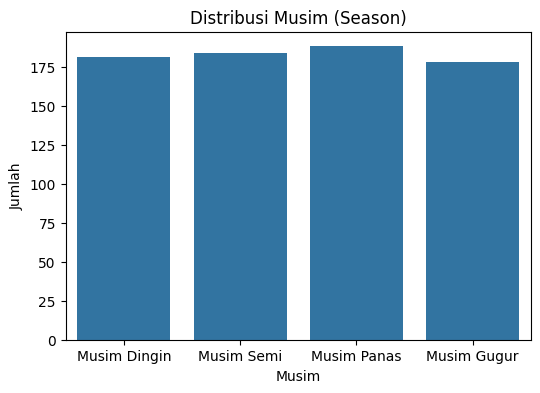

In [108]:
# Menampilkan Distribusi Kolom season (Musim)
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='season')
plt.title('Distribusi Musim (Season)')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

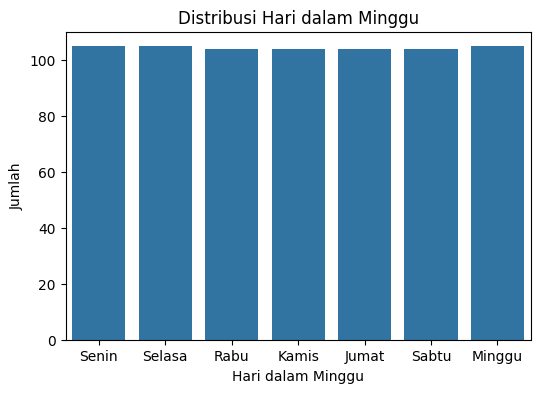

In [109]:
# Menampilkan Distribusi Kolom weekday (Hari dalam Minggu)
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='weekday')
plt.title('Distribusi Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

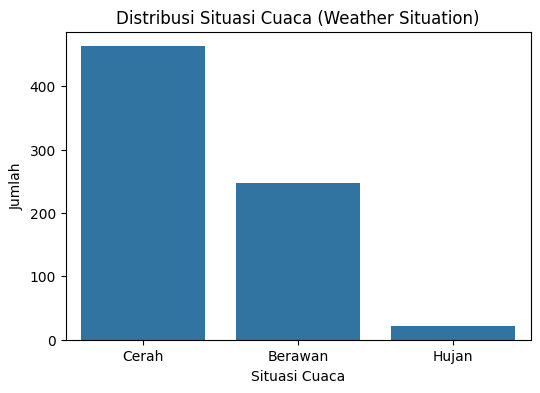

In [110]:
# Menampilkan Distribusi Kolom weathersit (Situasi Cuaca)
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='weathersit')
plt.title('Distribusi Situasi Cuaca (Weather Situation)')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan'])
plt.show()

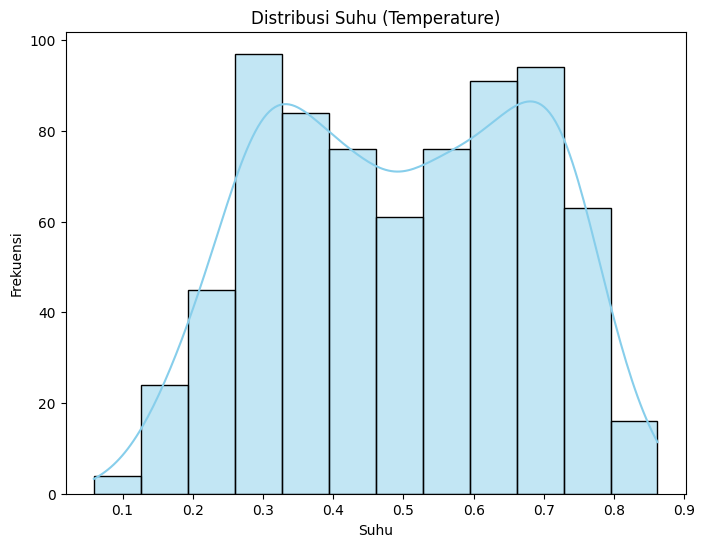

In [111]:
# Menampilkan Distribusi Kolom temp (Suhu)
plt.figure(figsize=(8, 6))
sns.histplot(day_cleaned['temp'], kde=True, color='skyblue')
plt.title('Distribusi Suhu (Temperature)')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

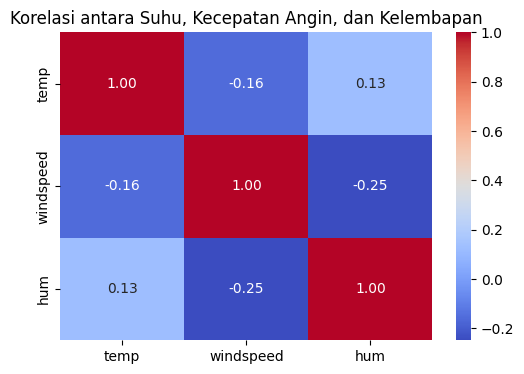

In [112]:
# Menampilkan Korelasi antara temp, windspeed, dan hum (Suhu, Kecepatan Angin, Kelembapan)
correlation = day_cleaned[['temp', 'windspeed', 'hum']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasi antara Suhu, Kecepatan Angin, dan Kelembapan')
plt.show()

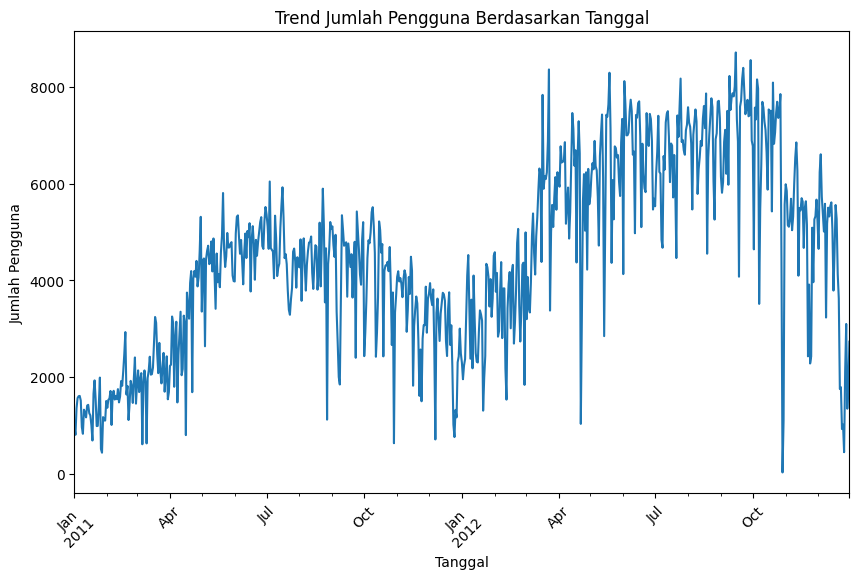

In [113]:
# Menampilkan Trend Jumlah Pengguna (cnt) berdasarkan Waktu (Kolom dteday)
plt.figure(figsize=(10, 6))
day_cleaned.groupby('dteday')['cnt'].sum().plot()
plt.title('Trend Jumlah Pengguna Berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

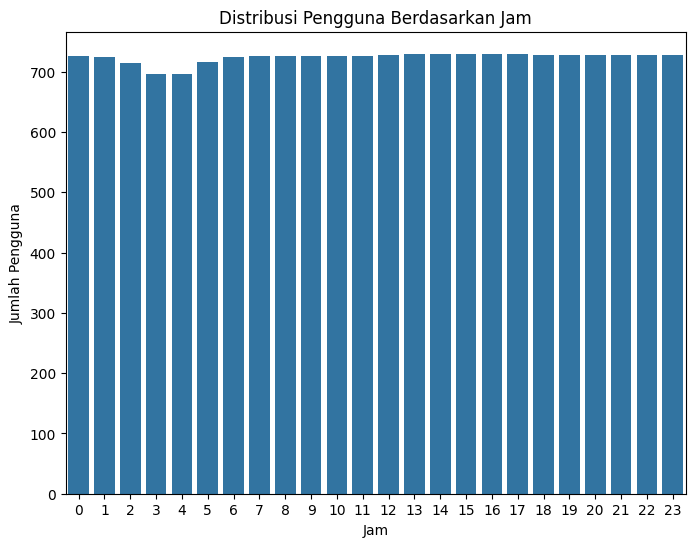

In [114]:
# Menampilkan Distribusi Pengguna Berdasarkan Jam (Kolom hour_of_day)
plt.figure(figsize=(8, 6))
sns.countplot(data=hour_cleaned, x='hour_of_day')
plt.title('Distribusi Pengguna Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

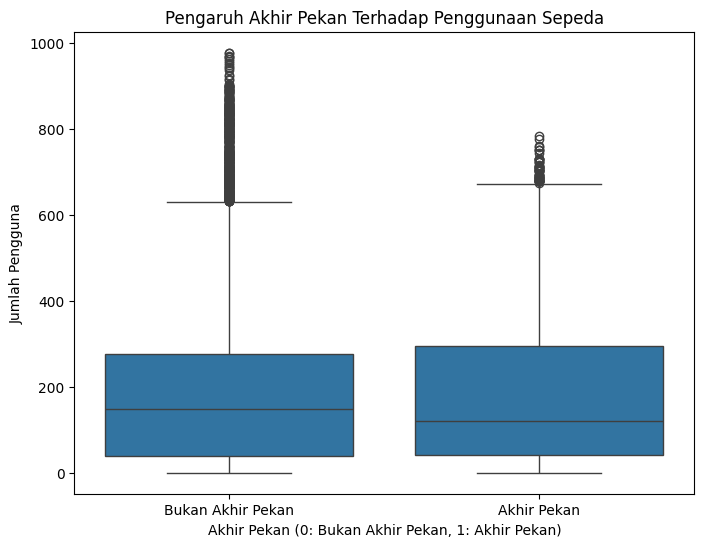

In [118]:
# Menampilkan Pengaruh Weekend Terhadap Penggunaan Sepeda
plt.figure(figsize=(8, 6))
sns.boxplot(data=hour_cleaned, x='weekend', y='cnt')
plt.title('Pengaruh Akhir Pekan Terhadap Penggunaan Sepeda')
plt.xlabel('Akhir Pekan (0: Bukan Akhir Pekan, 1: Akhir Pekan)')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=[0, 1], labels=['Bukan Akhir Pekan', 'Akhir Pekan'])
plt.show()

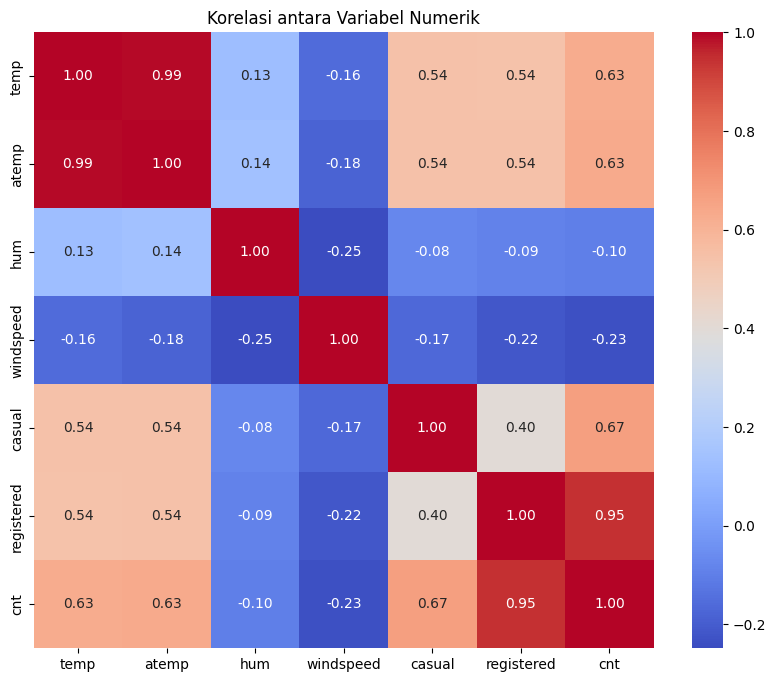

In [116]:
# Menampilkan Korelasi antara Variabel Numerik
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = day_cleaned[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasi antara Variabel Numerik')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan data, musim apa yang paling sering dipilih orang untuk bersepeda? - 10123175 - Riansyah Fahrial Azwani

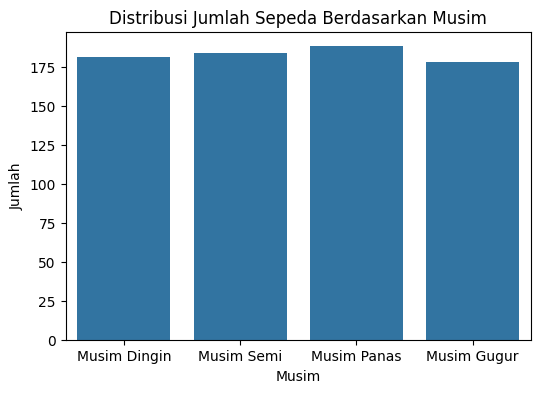

In [126]:
# Menampilkan distribusi jumlah sepeda berdasarkan musim
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='season')
plt.title('Distribusi Jumlah Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

### Pertanyaan 2: Bagaimana distribusi penggunaan sepeda berdasarkan hari dalam minggu? - 10123179 - Amar Ahmad

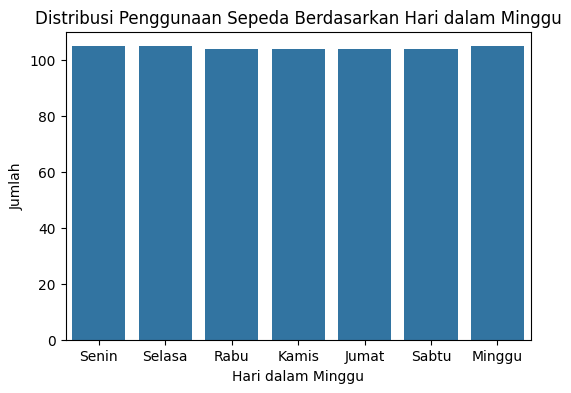

In [127]:
# Menampilkan distribusi penggunaan sepeda berdasarkan hari dalam minggu
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='weekday')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

### Pertanyaan 3: Apa pengaruh suhu terhadap jumlah sepeda yang digunakan? - 10123188 - Zhildan Saputra

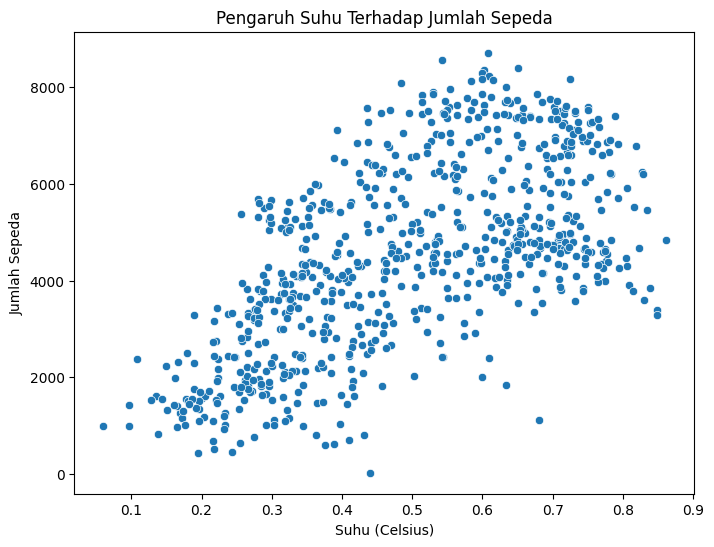

In [129]:
# Menampilkan hubungan suhu dengan jumlah sepeda yang digunakan
plt.figure(figsize=(8, 6))
sns.scatterplot(data=day_cleaned, x='temp', y='cnt')
plt.title('Pengaruh Suhu Terhadap Jumlah Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda')
plt.show()

### Pertanyaan 4: Bagaimana distribusi jumlah sepeda berdasarkan situasi cuaca? - 10123189 - Razan Rijalul Fiqri

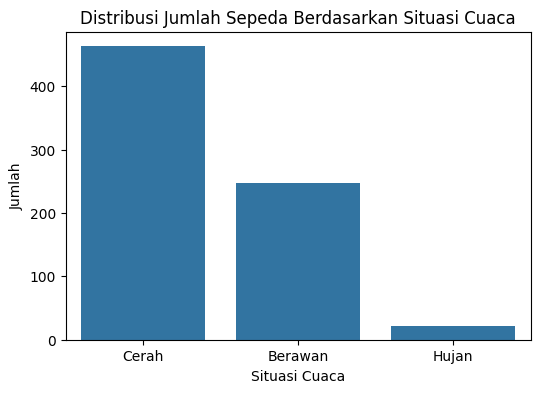

In [130]:
# Menampilkan distribusi jumlah sepeda berdasarkan situasi cuaca
plt.figure(figsize=(6, 4))
sns.countplot(data=day_cleaned, x='weathersit')
plt.title('Distribusi Jumlah Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan'])
plt.show()

### Pertanyaan 5: Apakah terdapat perbedaan penggunaan sepeda antara hari kerja dan akhir pekan? - 10123198 - Arswandi Raditya R. Sunusi

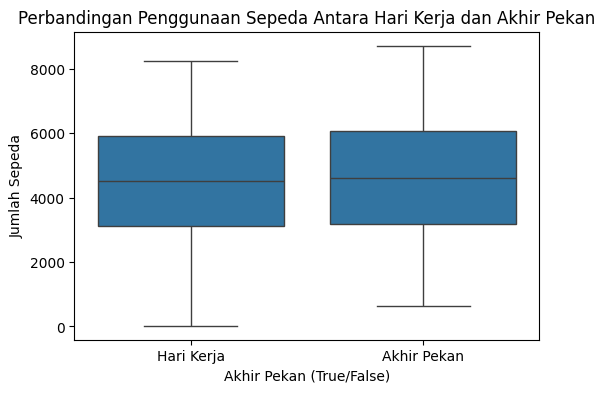

In [131]:
# Menampilkan perbandingan penggunaan sepeda pada hari kerja dan akhir pekan
day_cleaned['is_weekend'] = day_cleaned['weekday'].isin([5, 6])  # Sabtu dan Minggu
plt.figure(figsize=(6, 4))
sns.boxplot(data=day_cleaned, x='is_weekend', y='cnt')
plt.title('Perbandingan Penggunaan Sepeda Antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Akhir Pekan (True/False)')
plt.ylabel('Jumlah Sepeda')
plt.xticks([0, 1], ['Hari Kerja', 'Akhir Pekan'])
plt.show()

### Pertanyaan 6: Bagaimana pengaruh hari dalam seminggu terhadap suhu yang tercatat? - 10123210 - Bramantio Dewangga

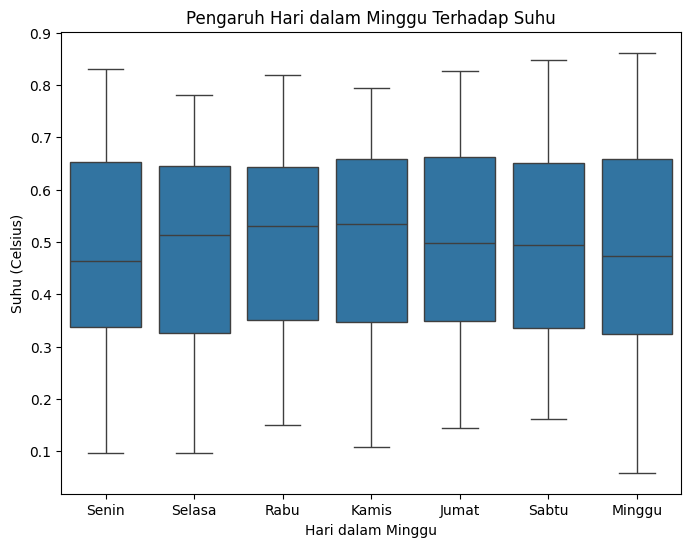

In [133]:
# Menampilkan hubungan antara hari dalam minggu dengan suhu
plt.figure(figsize=(8, 6))
sns.boxplot(data=day_cleaned, x='weekday', y='temp')
plt.title('Pengaruh Hari dalam Minggu Terhadap Suhu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Suhu (Celsius)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

## Conclusion

- Conclution pertanyaan 1: Berdasarkan data, musim apa yang paling sering dipilih orang untuk bersepeda? - 10123175 - Riansyah Fahrial Azwani

  Distribusi jumlah sepeda cenderung lebih banyak pada musim semi dan musim panas dibandingkan dengan musim dingin atau musim gugur.

- Conclution pertanyaan 2: Bagaimana distribusi penggunaan sepeda berdasarkan hari dalam minggu? - 10123179 - Amar Ahmad

  Penggunaan sepeda lebih banyak pada hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu), yang mungkin disebabkan oleh rutinitas kerja yang lebih tinggi selama hari kerja.

- Conclution pertanyaan 3: Apa pengaruh suhu terhadap jumlah sepeda yang digunakan? - 10123188 - Zhildan Saputra

  Terdapat hubungan positif antara suhu dan jumlah sepeda yang digunakan. Semakin tinggi suhu, semakin banyak jumlah sepeda yang digunakan, yang menunjukkan bahwa cuaca yang lebih panas cenderung mendorong penggunaan sepeda.

- Conclution Pertanyaan 4: Bagaimana distribusi jumlah sepeda berdasarkan situasi cuaca? - 10123189 - Razan Rijalul Fiqri
  
  Jumlah sepeda yang digunakan paling banyak terjadi ketika cuaca cerah, diikuti oleh cuaca berawan. Penggunaan sepeda sangat berkurang ketika cuaca hujan, yang menunjukkan bahwa orang cenderung menghindari bersepeda saat cuaca buruk.

- Conclution Pertanyaan 5: Apakah terdapat perbedaan penggunaan sepeda antara hari kerja dan akhir pekan? - 10123198 - Arswandi Raditya R. Sunusi

  Jumlah sepeda yang digunakan lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini mungkin karena orang cenderung bersepeda sebagai bagian dari rutinitas harian mereka (misalnya, untuk bekerja atau sekolah).

- Conclution Pertanyaan 6: Bagaimana pengaruh hari dalam seminggu terhadap suhu yang tercatat? - 10123210 - Bramantio Dewangga

   Suhu tidak menunjukkan pola yang jelas tergantung pada hari dalam seminggu. Suhu tampaknya lebih tergantung pada faktor musiman dan tidak berfluktuasi signifikan berdasarkan hari dalam minggu.